# Model-1 Face Recognition

## Installing Dependencies

In [2]:
!pip install opencv-python-headless insightface onnxruntime scikit-learn numpy matplotlib


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached cython-3.1.1-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached numpy-2.2.6-cp310-cp310-win_amd64.whl (12.9 MB)
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-win_amd64.whl size=879364 sha256=7ff11222c237989c71aed5fc2a818f13ae176f1b5fae8999228166219497a962
  Stored in directory: c:\users\rochan\appdata\local\pip\cache\wheels\e3\d0\80\e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.10.0 requires protobuf<3.20,>=3.9.2, but you have protobuf 6.31.0 which is incompatible.
tensorboard 2.10.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 6.31.0 which is incompatible.
You should consider upgrading via the 'C:\Users\Rochan\Desktop\Coding\Student_Surveillance\student-surveillance-venv\Scripts\python.exe -m pip install --upgrade pip' command.


## Step 1: Load MTCNN (Detector) & Inception ResNet (Embedder) with GPU Support

Using device: cuda
Detected 2 faces.


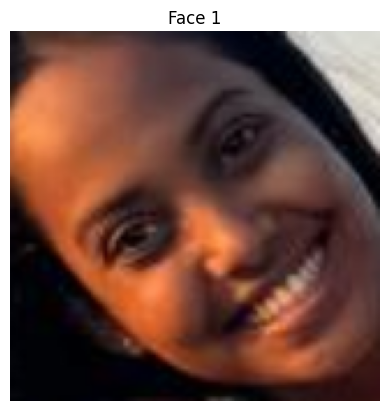

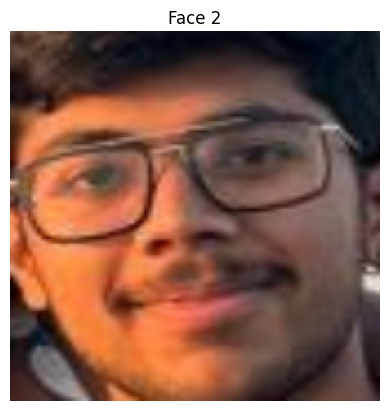

In [10]:
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# Use GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

# Initialize face detector (MTCNN) and embedder (InceptionResnetV1)
mtcnn = MTCNN(image_size=160, margin=14, keep_all=True, min_face_size=20, device=device)
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# Function to detect faces and get embeddings from an image
def get_faces_and_embeddings(img_path):
    img = Image.open(img_path)

    # Detect faces
    faces = mtcnn(img)  # Could be None, 3D tensor, or 4D tensor

    if faces is None:
        print("No faces detected.")
        return [], []

    # Convert to batch tensor of shape [N, 3, 160, 160]
    if faces.ndim == 3:
        faces = faces.unsqueeze(0)  # Add batch dimension if single face

    # Move to device and get embeddings all at once (batch)
    faces = faces.to(device)
    with torch.no_grad():
        embeddings = resnet(faces)  # Output shape [N, 512]

    # Split embeddings back to list of tensors on CPU
    embeddings_list = [emb.cpu() for emb in embeddings]

    # Return faces as list of tensors too (on CPU for visualization)
    faces_list = [face.cpu() for face in faces]

    return faces_list, embeddings_list


# Example usage
img_path = r"C:\Users\Rochan\Desktop\Rochan\Sorry\May\5a0d4ca9-a709-45e1-aa20-ee58a21eca6a.JPG"  # Replace with your image path

faces, embeddings = get_faces_and_embeddings(img_path)

print(f"Detected {len(faces)} faces.")

# Show detected faces
for i, face in enumerate(faces):
    plt.figure()
    # Convert face tensor [-1,1] to PIL Image (auto-rescales)
    face_img = F.to_pil_image((face + 1) / 2)  # Rescale to [0,1]
    plt.imshow(face_img)
    plt.title(f"Face {i+1}")
    plt.axis('off')
    plt.show()
